## Figuring out how to plot the MinMs targets in 3D

In [1]:
#Importing some modules to help out with the plotting 
from mpl_toolkits import mplot3d #This contains a lot of the 3D stuff that we can play around with 
%matplotlib notebook

#Standard imports below 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
cd ../../../Downloads/

/Users/u5ajain/Downloads


In [4]:
#Importing the data from the excel sheets and into arrays 
new_data = pd.read_csv('MinMs_Sample_Properties - Gaia Properties.csv')
old_data = pd.read_csv('MinMs_Sample_Properties - MinMs_old remove.csv')

<IPython.core.display.Javascript object>


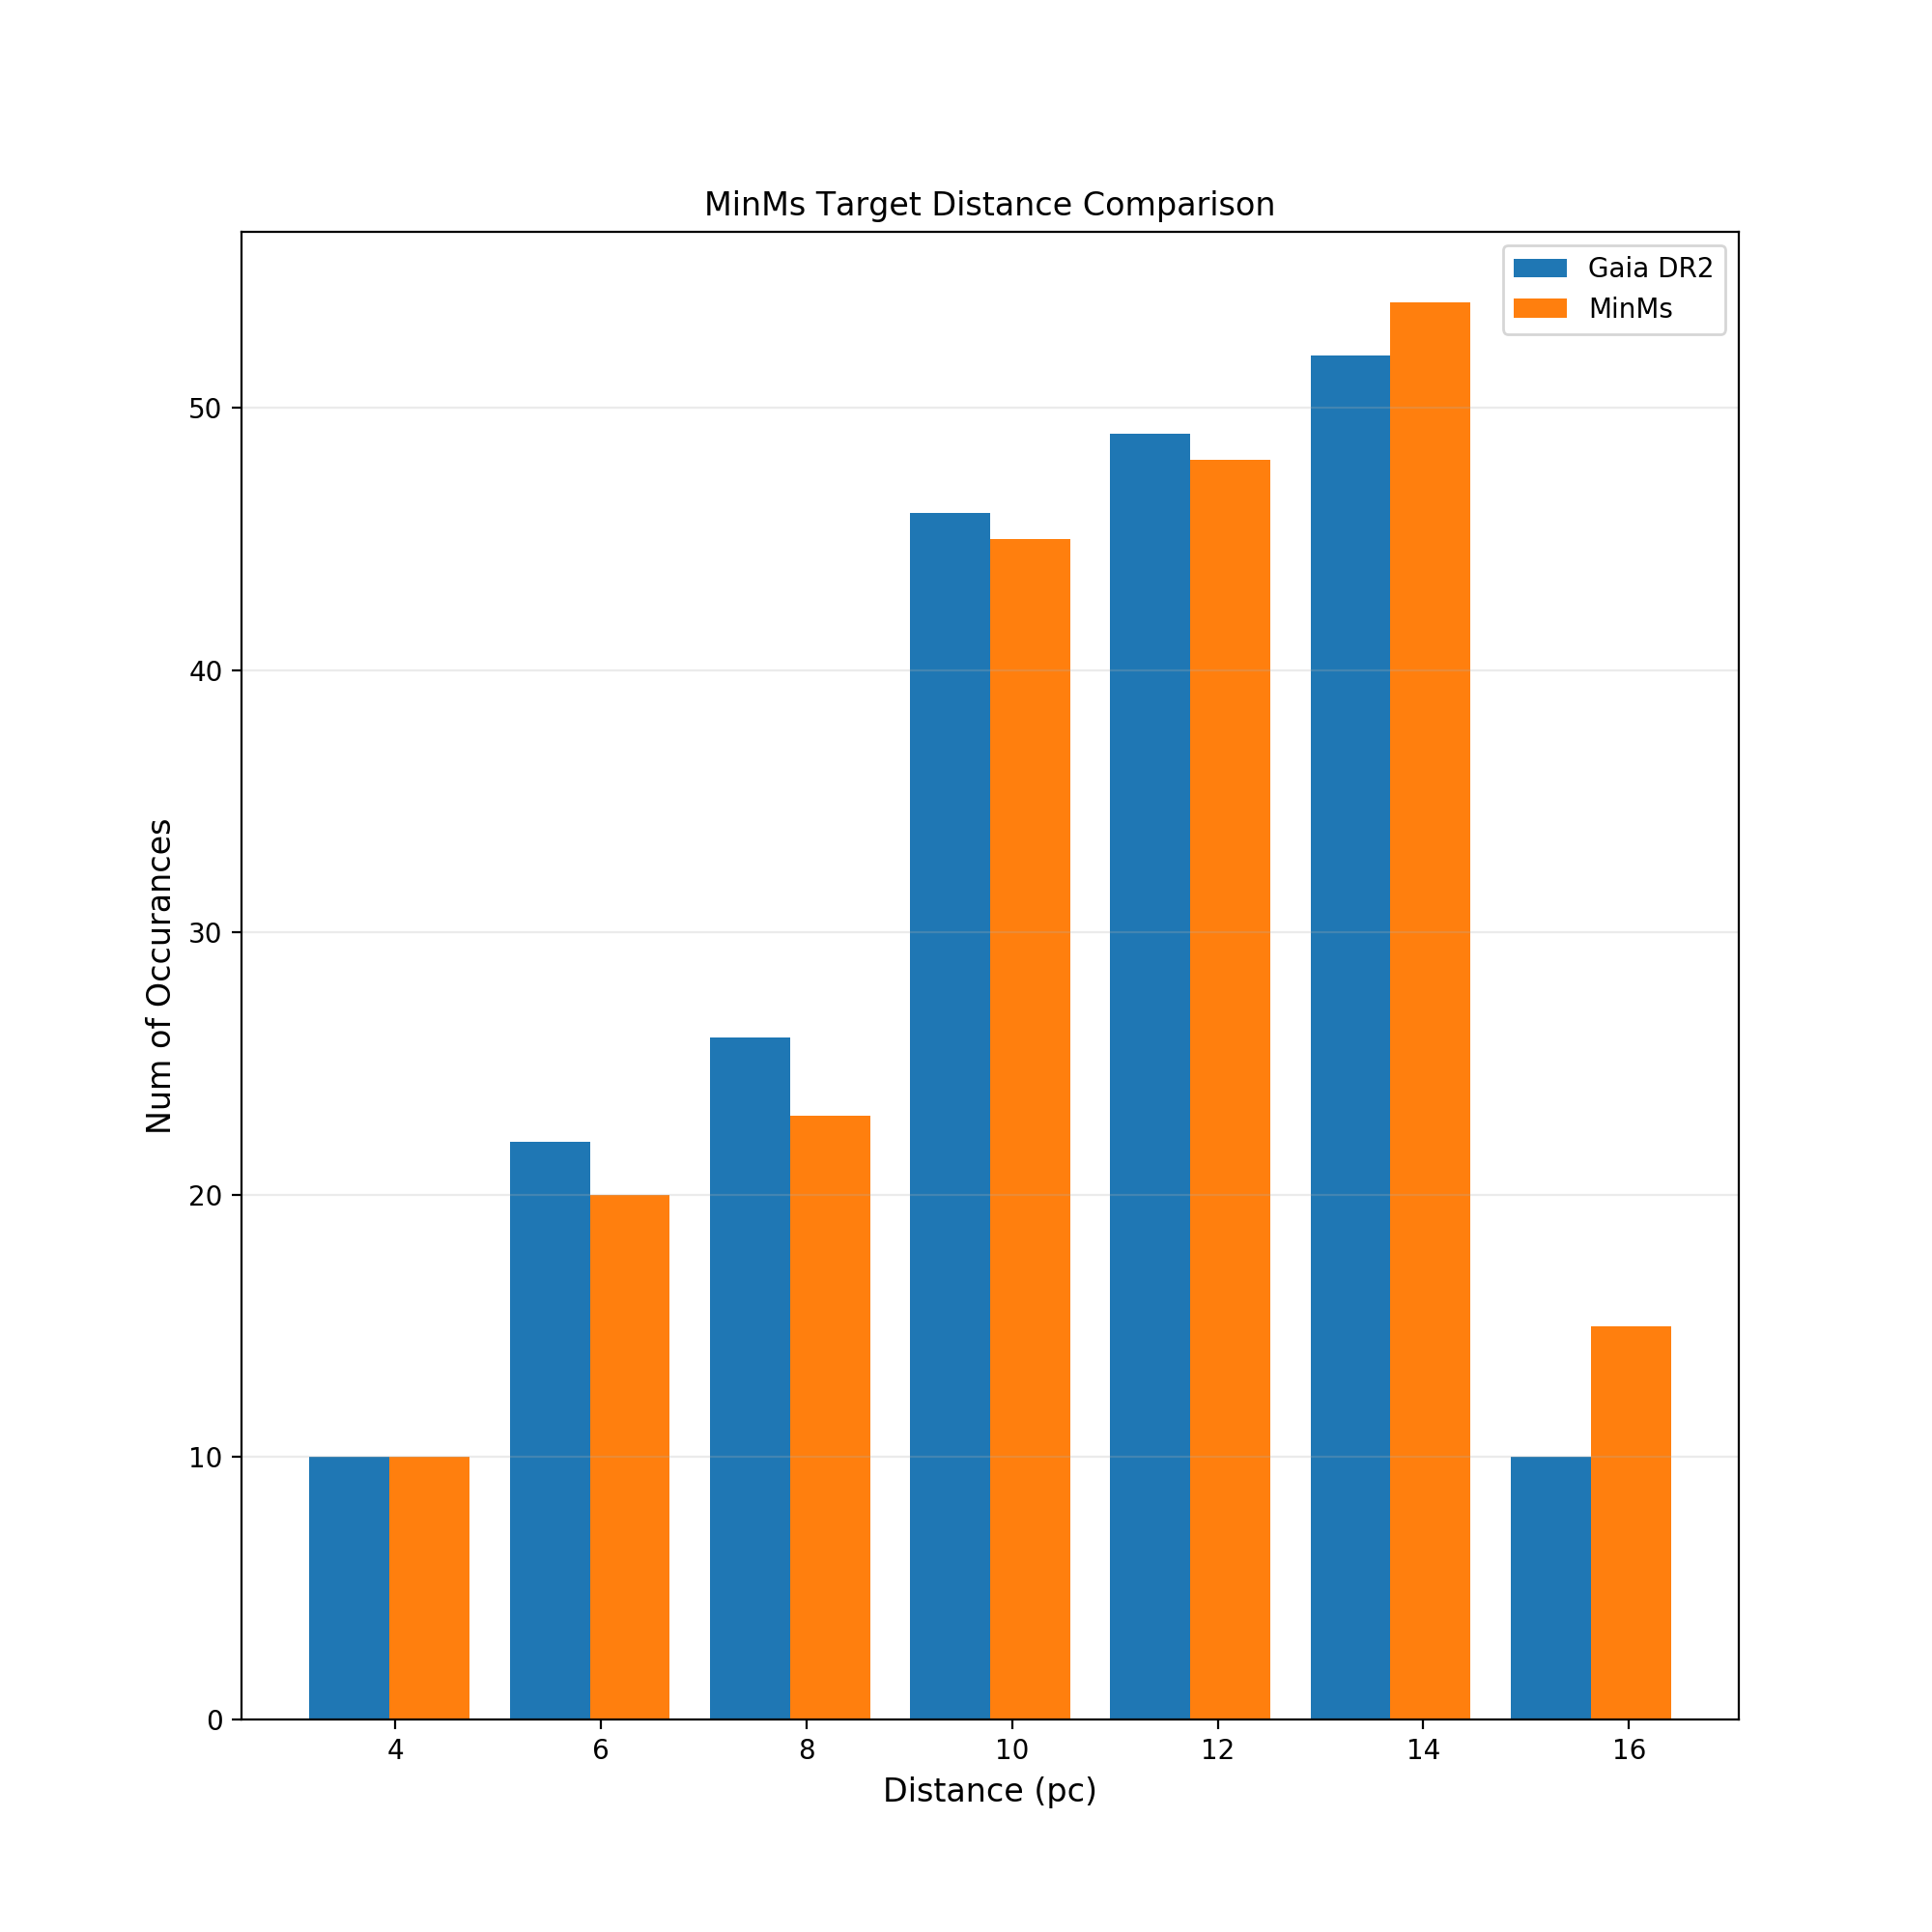

In [7]:
#This code creates a histogram displaying the comparison distances between the old HIP data and new Gaia data
old = old_data['Dist\n pc']
new = new_data['Distance']

plt.figure(figsize=(10,10))
plt.hist([old,new],bins=7,stacked = False)

plt.xlabel('Distance (pc)',fontsize=12)
plt.ylabel('Num of Occurances',fontsize=12)
plt.title('MinMs Target Distance Comparison',fontsize=12)
plt.grid(axis ='y', alpha = 0.25)
plt.legend({'Gaia DR2','MinMs'})
Tplt.savefig('Histogram.png')

<IPython.core.display.Javascript object>


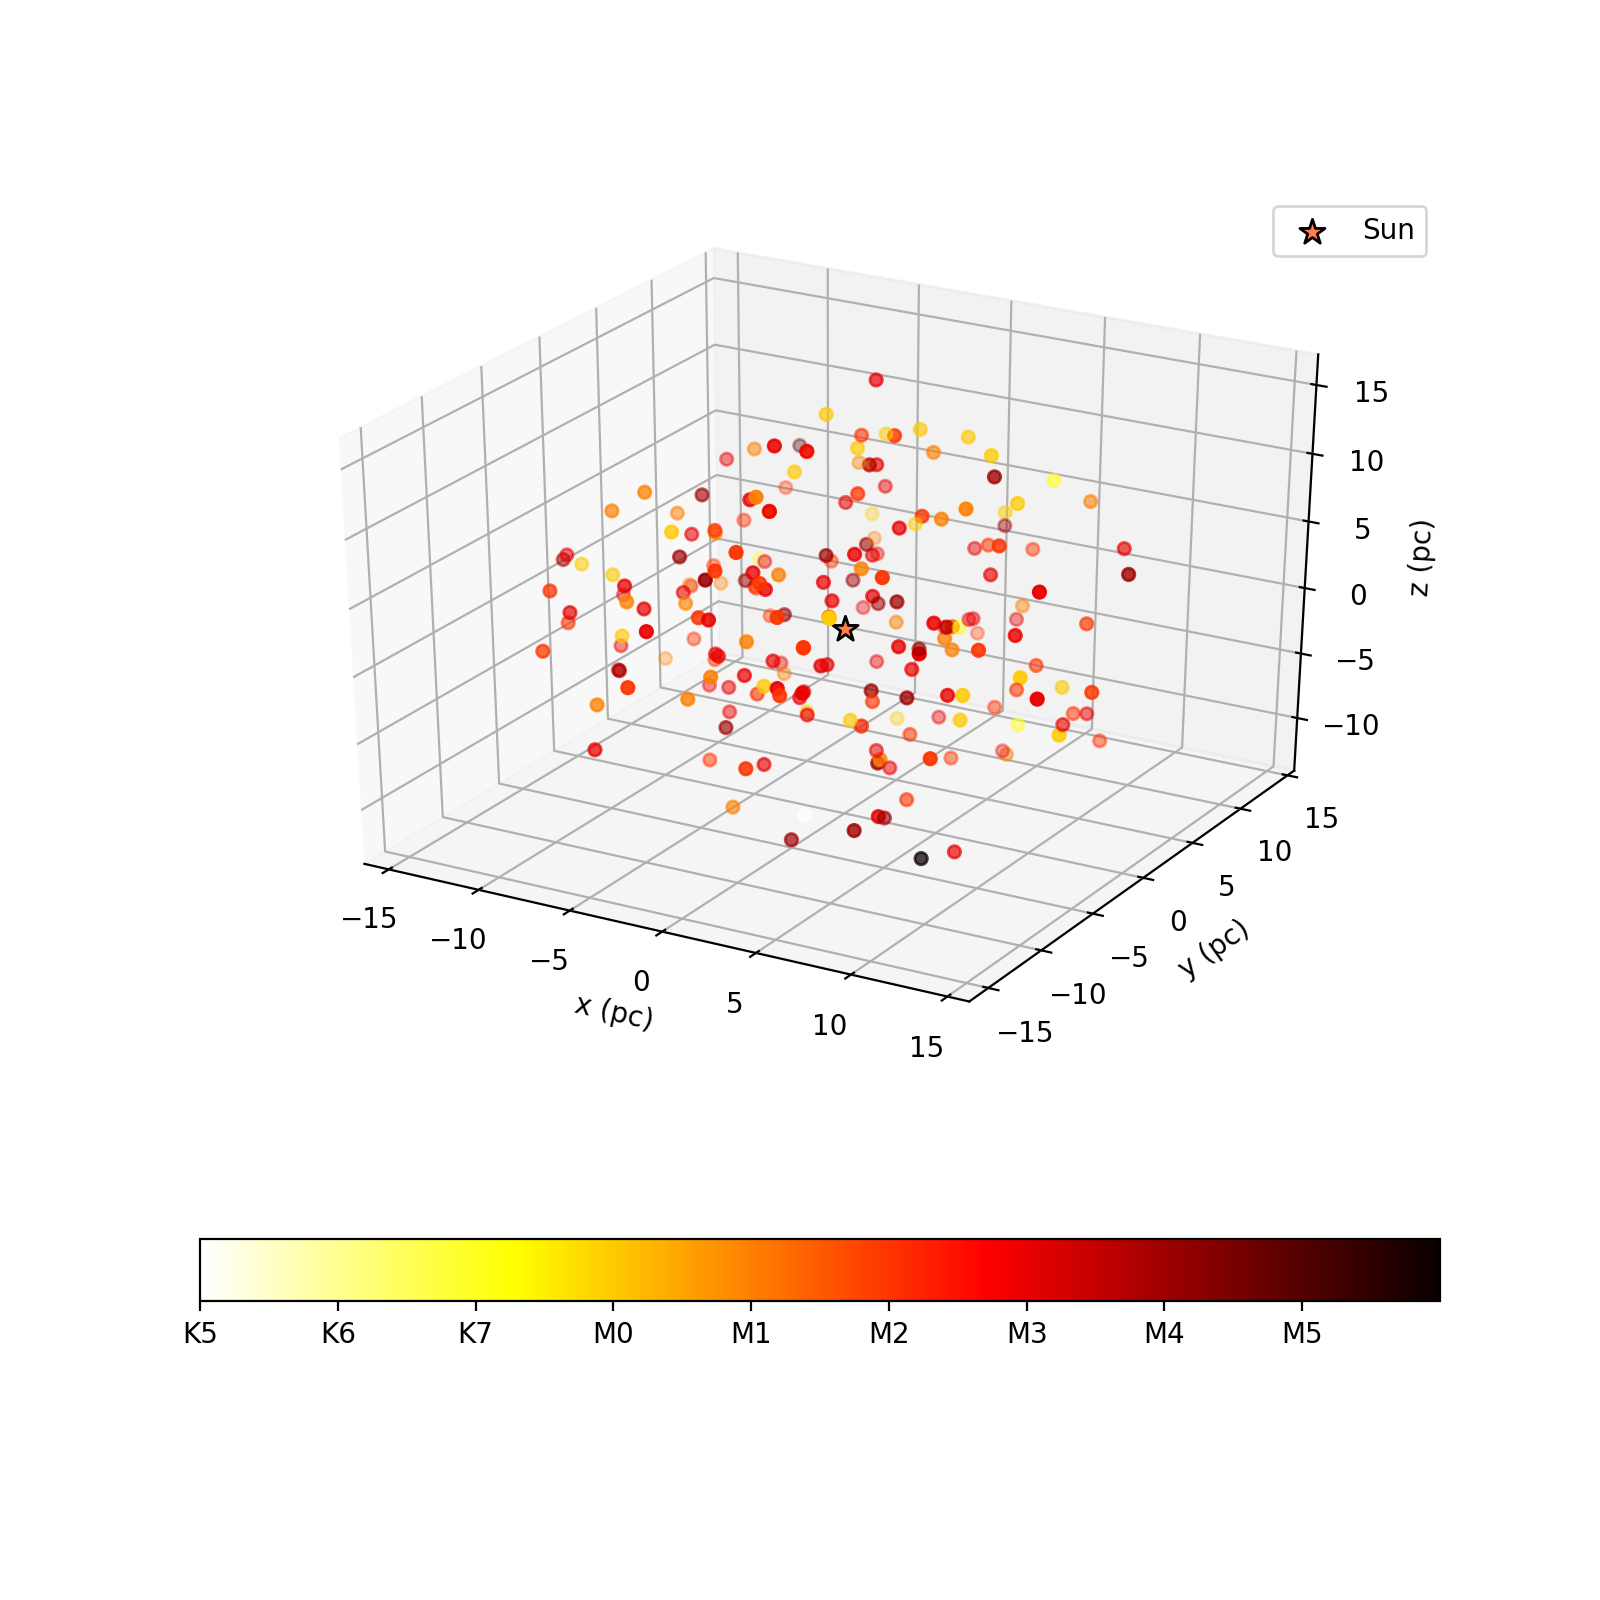

In [21]:
#This code makes the 3D plot of the stellar neighborhood using Gaia data 
#Imorting any neccessary models 
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib notebook 
#This is so that we can interact with the figure 

#Importing data from relevant text files 
ra,dec,d = np.genfromtxt('radecd.txt', unpack=True, skip_header=1)
spectra = pd.read_csv('spectra.txt')

#Creating empty arrays to be appended to later
x = []
y = []
z = []
spect = []

#Creating dictionaries  so that values are matched with other values 
#Matching spectral types with a number
dict = {'K5':-3,'K7':-1,'M0':0,'M1':1,'M2':2,'M3':3,'M4':4,'M5':5,'M6':6}

for ii in range(0,len(ra)):
    #This for loop takes the data from the redecd file and changes it to cartersian coodinates so that our plot can have the Sun at the center of the plot
    c = SkyCoord(ra=ra[ii]*u.degree, dec = dec[ii]*u.degree, distance=d[ii]*u.pc)
    x.append(c.cartesian.x.value)
    y.append(c.cartesian.y.value)
    z.append(c.cartesian.z.value)
    
for i in range(len(spectra['Spectral Type'])):
    #The purpose of this for loop is to convert the spectral types of the targets to numbers and append to an empty array
    conversion = dict.get(spectra['Spectral Type'][i])
    spect.append(conversion)

labels = ['K5','K6','K7','M0','M1','M2','M3','M4','M5','M6']
    
#Plotting the 3D figure here 
%matplotlib notebook
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

color = [] #Setting up an empty array for the color values to be set to 

cmhot = plt.get_cmap("hot_r")

#Plotting
p = ax.scatter3D(x,y,z, cmap=cmhot, c=spect) #c = color is set by the colors dictionary
ax.scatter(0,0,0, color ='coral',label = 'Sun', marker='*', edgecolors='k', s=90) #Plotting the Sun 
plt.legend()
ax.set_xlabel('x (pc)')
ax.set_ylabel('y (pc)')
ax.set_zlabel('z (pc)')


cbar = fig.colorbar(p, ticks=[-3,-2,-1,0,1,2,3,4,5], orientation='horizontal')
cbar.ax.set_xticklabels(labels)  # horizontal colorbar
plt.show()

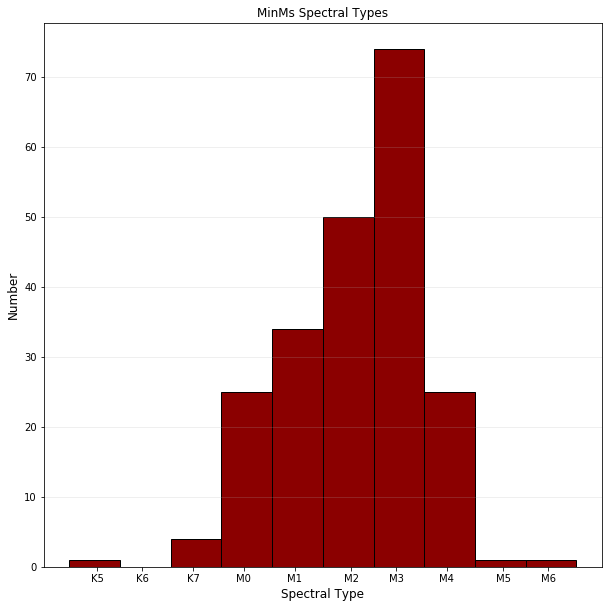

In [36]:
#This figure outputs the MinMs targets by spectral type 
%matplotlib inline

test_s =spect.sort()
plt.figure(figsize=(10,10))
plt.hist(spect,align='mid',edgecolor='black',color = 'darkred')

plt.xlabel('Spectral Type',fontsize=12)
plt.ylabel('Number',fontsize=12)
plt.title('MinMs Spectral Types',fontsize=12)
plt.grid(axis ='y', alpha = 0.25)
plt.xticks(ticks=[-2.5,-1.7,-0.8,.1,1,2,2.8,3.7,4.7,5.5],labels=['K5','K6','K7','M0','M1','M2','M3','M4','M5','M6'])
plt.savefig=('SpectraltypeHist.png')